We will be analyzing restaurant data from the different restaurants we specified in Progress Report #1.

In [6]:
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
cdg_data = pd.read_csv('data/cho-dang-gol/csv/detailed-reviews-of-cho-dang-gol.csv')

cdg_data[['place_name', 'rating', 'review_text', 'published_at_date']]

,place_name,rating,review_text,published_at_date
0,Cho Dang Gol,5,"Service was excellent, food was delicious, and...",2024-03-01 02:28:47.011670
1,Cho Dang Gol,5,Delicious food with a good vegetarian options....,2024-02-29 12:28:47.018767
2,Cho Dang Gol,5,"Authentic Korean dishes, and everything is so ...",2024-02-29 12:28:47.022915
3,Cho Dang Gol,5,"Wow, more delicious than Korea... Really crazy...",2024-02-28 12:28:47.026745
4,Cho Dang Gol,5,Korean restaurant located in Koreatown. This p...,2024-02-27 12:28:47.030659
...,...,...,...,...
2270,Cho Dang Gol,5,"Be careful here, some of the dished are worth ...",2012-03-01 12:31:38.959637
2271,Cho Dang Gol,4,"reasonably priced, authentic korean food. vege...",2012-03-01 12:31:38.963049
2272,Cho Dang Gol,5,This has turned into my favorite Korean restau...,2012-03-01 12:31:38.966705
2273,Cho Dang Gol,4,NaN,2012-03-01 12:31:38.970457


Charts for ratings

<AxesSubplot: >

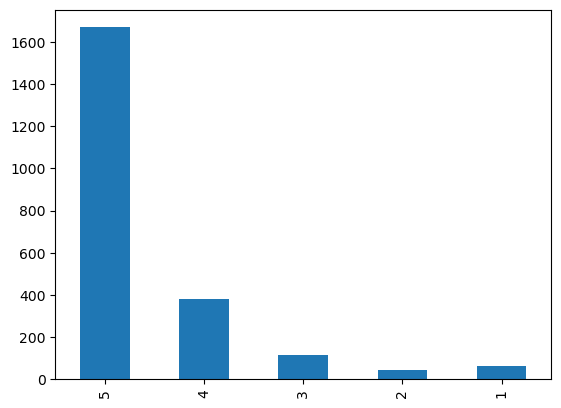

In [9]:
cdg_data['rating'].value_counts()[[5, 4, 3, 2, 1]].plot(kind='bar')

<AxesSubplot: title={'center': 'Cho-Dang-Gol restaurant ratings'}, ylabel='rating'>

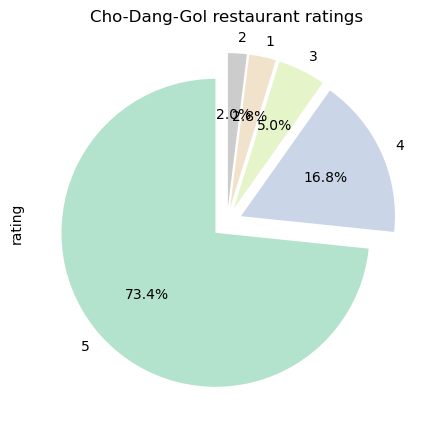

In [16]:
kwargs = dict(
    startangle = 90,
    colormap   = 'Pastel2',
    fontsize   = 10,
    explode    = (0.1,0.1,0.1,0.1,0.1),
    figsize    = (60,5),
    autopct    = '%1.1f%%',
    title      = 'Cho-Dang-Gol restaurant ratings'
)

cdg_data['rating'].value_counts().plot.pie(**kwargs)

In [39]:
cdg_data['review_text'] = cdg_data['review_text'].astype("string")

cdg_data[['review_text']]

,review_text
0,"Service was excellent, food was delicious, and..."
1,Delicious food with a good vegetarian options....
2,"Authentic Korean dishes, and everything is so ..."
3,"Wow, more delicious than Korea... Really crazy..."
4,Korean restaurant located in Koreatown. This p...
...,...
2270,"Be careful here, some of the dished are worth ..."
2271,"reasonably priced, authentic korean food. vege..."
2272,This has turned into my favorite Korean restau...
2273,<NA>


In [36]:
import re
from nltk.stem import WordNetLemmatizer, PorterStemmer, SnowballStemmer
stop_words_file = 'Stopwords.txt'

stop_words = []

with open(stop_words_file, "r") as f:
    for line in f:
        stop_words.extend(line.split()) 
        
stop_words = stop_words  

def preprocess(raw_text):
    
    #regular expression keeping only letters 
    letters_only_text = re.sub("[^a-zA-Z]", " ", raw_text)

    # convert to lower case and split into words -> convert string into list ( 'hello world' -> ['hello', 'world'])
    words = letters_only_text.lower().split()

    cleaned_words = []
    lemmatizer = PorterStemmer() #plug in here any other stemmer or lemmatiser you want to try out
    
    # remove stopwords
    for word in words:
        if word not in stop_words:
            cleaned_words.append(word)
    
    # stemm or lemmatise words
    stemmed_words = []
    for word in cleaned_words:
        word = lemmatizer.stem(word)   #dont forget to change stem to lemmatize if you are using a lemmatizer
        stemmed_words.append(word)
    
    # converting list back to string
    return " ".join(stemmed_words)

In [37]:
test_sentence = "Service was excellent, food was delicious, and vibe was great ! We got the korean style boneless fried chicken (sweet chili sauce was fire), veg buckwheat pancake, and spicy chicken. Our server was so kind and attentive & we had a great experience; the sweet treat cookie at end was so cute :)"

preprocess(test_sentence)

'servic excel food delici vibe great korean style boneless fri chicken sweet chili sauc fire veg buckwheat pancak spici chicken server kind attent great experi sweet treat cooki end cute'

In [49]:
# cdg_data['prep'] = cdg_data['review_text'].apply(preprocess)

prep = []

for text in cdg_data['review_text']:
    if pd.isna(text):
        prep.append('')
    else:
        prep.append(preprocess(text))

cdg_data['prep'] = prep

cdg_data.head()

,place_id,place_name,review_id_hash,rating,review_text,published_at,published_at_date,response_from_owner_text,response_from_owner_ago,response_from_owner_date,review_likes_count,total_number_of_reviews_by_reviewer,total_number_of_photos_by_reviewer,is_local_guide,review_translated_text,response_from_owner_translated_text,prep
0,ChIJU0c2Y6lZwokRKlyc_R8HN88,Cho Dang Gol,bb6368fce6cf018e803e7c82e1ca4880,5,"Service was excellent, food was delicious, and...",10 hours ago,2024-03-01 02:28:47.011670,NaN,NaN,NaN,0,180.0,158.0,True,NaN,NaN,servic excel food delici vibe great korean sty...
1,ChIJU0c2Y6lZwokRKlyc_R8HN88,Cho Dang Gol,0f453aea68752b26deeeb581806e2a11,5,Delicious food with a good vegetarian options....,a day ago,2024-02-29 12:28:47.018767,NaN,NaN,NaN,0,74.0,99.0,True,NaN,NaN,delici food good vegetarian option staff knowl...
2,ChIJU0c2Y6lZwokRKlyc_R8HN88,Cho Dang Gol,06d54e6d799f70cbf922187dcc59ddf5,5,"Authentic Korean dishes, and everything is so ...",a day ago,2024-02-29 12:28:47.022915,NaN,NaN,NaN,0,10.0,18.0,True,NaN,NaN,authent korean dish good server friendli choda...
3,ChIJU0c2Y6lZwokRKlyc_R8HN88,Cho Dang Gol,c13d96f6014d6e367c9b67c29042cb20,5,"Wow, more delicious than Korea... Really crazy...",2 days ago,2024-02-28 12:28:47.026745,NaN,NaN,NaN,0,600.0,11678.0,True,... !!! !,NaN,wow delici korea crazi tast time
4,ChIJU0c2Y6lZwokRKlyc_R8HN88,Cho Dang Gol,d66b53470a0d72baa2beb2c783c9093f,5,Korean restaurant located in Koreatown. This p...,3 days ago,2024-02-27 12:28:47.030659,NaN,NaN,NaN,0,122.0,686.0,True,NaN,NaN,korean restaur locat koreatown place fill quic...


In [50]:
from collections import Counter
Counter(" ".join(cdg_data["prep"]).split()).most_common(10)

[('food', 901),
 ('korean', 684),
 ('tofu', 599),
 ('good', 464),
 ('delici', 408),
 ('dish', 406),
 ('restaur', 383),
 ('servic', 318),
 ('great', 318),
 ('place', 297)]